# Decision Tree

Given Logistic Regression does not work well with our dataset, let's try to use Decision Tree instead.

Decision Tree often work well with non-linear imbalanced dataset

For recap, our previous results

Threshold Predictor: 
- F2 Score on Training Data: 0.6654767975522693
- F2 Score on Test Data: 0.7012195121951219
- Accuracy on Training Data: 0.924375
- Accuracy on Test Data: 0.928

LogisticRegression:
- F2 Score on Training Data: 0.293631100082713
- F2 Score on Test Data: 0.23255813953488372
- Accuracy on Training Data: 0.970875
- Accuracy on Test Data: 0.9685

LogisticRegression on balanced dataset
- F2 Score on Training Data: 0.8526746390243292
- F2 Score on Test Data: 0.6944771290708951
- Accuracy on Training Data: 0.8526936026936027
- Accuracy on Test Data: 0.8555


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
X_train=pd.read_csv('data/X_train.csv')
y_train=pd.read_csv('data/y_train.csv')
X_test=pd.read_csv('data/X_test.csv')
y_test=pd.read_csv('data/y_test.csv')
df_train=pd.concat([X_train, y_train], axis=1)
df_test=pd.concat([X_test, y_test], axis=1)

y_train_omf = y_train['Machine failure']
y_test_omf = y_test['Machine failure']
y_train_over_omf = pd.read_csv('data/y_smote_train.csv')
X_train_over_omf = pd.read_csv('data/X_smote_train.csv')

X_train_reduced = X_train.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])
X_test_reduced = X_test.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])
X_train_over_reduced = X_train_over_omf.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])

y_ros_train = pd.read_csv('data/y_ros_train.csv')
X_ros_train = pd.read_csv('data/X_ros_train.csv')
X_ros_train_reduced = X_ros_train.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])


y_mls_train = pd.read_csv('data/y_mls_train.csv')
X_mls_train = pd.read_csv('data/X_mls_train.csv')
X_mls_train_reduced = X_mls_train.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])

y_mls_rus_train = pd.read_csv('data/y_mls_rus_train.csv')
X_mls_rus_train = pd.read_csv('data/X_mls_rus_train.csv')
X_mls_rus_train_reduced = X_mls_rus_train.drop(columns=['Torque (Nm)', 'Process temperature (K)', 'Air temperature (K)'])
y_ros_rus_train = pd.read_csv('data/y_ros_rus_train.csv')
X_ros_rus_train = pd.read_csv('data/X_ros_rus_train.csv')

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of X_train_reduced:", X_train_reduced.shape)
print("Shape of X_test_reduced:", X_test_reduced.shape)
print("Shape of X_train_over_reduced:", X_train_over_reduced.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of y_train_omf:", y_train_omf.shape)
print("Shape of y_test_omf:", y_test_omf.shape)
print("Shape of y_train_over_omf:", y_train_over_omf.shape)
print("Shape of X_train_over_omf:", X_train_over_omf.shape)
print("Shape of y_ros_train:", y_ros_train.shape)
print("Shape of X_ros_train:", X_ros_train.shape)

print("Shape of y_mls_train:", y_mls_train.shape)
print("Shape of X_mls_train:", X_mls_train.shape)
print("Shape of y_mls_rus_train:", y_mls_rus_train.shape)
print("Shape of X_mls_rus_train:", X_mls_rus_train.shape)
print("Shape of y_mls_rus_train:", y_ros_rus_train.shape)
print("Shape of X_mls_rus_train:", X_ros_rus_train.shape)

Shape of X_train: (8000, 9)
Shape of X_test: (2000, 9)
Shape of X_train_reduced: (8000, 6)
Shape of X_test_reduced: (2000, 6)
Shape of X_train_over_reduced: (15444, 6)
Shape of y_train: (8000, 6)
Shape of y_test: (2000, 6)
Shape of y_train_omf: (8000,)
Shape of y_test_omf: (2000,)
Shape of y_train_over_omf: (15444, 1)
Shape of X_train_over_omf: (15444, 9)
Shape of y_ros_train: (15228, 6)
Shape of X_ros_train: (15228, 9)
Shape of y_mls_train: (15499, 6)
Shape of X_mls_train: (15499, 9)
Shape of y_mls_rus_train: (7832, 6)
Shape of X_mls_rus_train: (7832, 9)
Shape of y_mls_rus_train: (7228, 6)
Shape of X_mls_rus_train: (7228, 9)


In [5]:
from sklearn.metrics import classification_report, fbeta_score, precision_score, recall_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

def analyze_model_performance(clf, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, target='Machine failure'):
    y_train_omf = y_train[target]
    y_test_omf = y_test[target]
    clf.fit(X_train, y_train_omf)
    y_train_pred_omf = clf.predict(X_train)
    y_test_pred_omf = clf.predict(X_test)
    f2_train=fbeta_score(y_train_omf, y_train_pred_omf, beta=2)
    f2_test=fbeta_score(y_test_omf, y_test_pred_omf, beta=2)
    train_recall=recall_score(y_train_omf, y_train_pred_omf)
    test_recall=recall_score(y_test_omf, y_test_pred_omf)
    train_precision=precision_score(y_train_omf, y_train_pred_omf, zero_division=0)
    test_precision=precision_score(y_test_omf, y_test_pred_omf, zero_division=0)
    train_accuracy=accuracy_score(y_train_omf, y_train_pred_omf)
    test_accuracy=accuracy_score(y_test_omf, y_test_pred_omf)
    predictor_name = clf.__class__.__name__


    plt.figure(figsize=(10, 5))
    cm = confusion_matrix(y_train_omf, y_train_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pass', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 1))
    plt.title(f'{predictor_name} on Train Data')
    cm = confusion_matrix(y_test_omf, y_test_pred_omf)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Pass', 'Failure'])
    disp.plot(cmap=plt.cm.Blues, ax=plt.subplot(1, 2, 2))
    plt.title(f'{predictor_name} on Test Data')
    plt.show()


    print(" For `Machine failure` label:")
    print(predictor_name, " :")
    print(f"- F2 Score on Training Data: {f2_train}")
    print(f"- F2 Score on Test Data: {f2_test}")
    print(f"- Accuracy on Training Data: {train_accuracy}")
    print(f"- Accuracy on Test Data: {test_accuracy}")
    print(f"- Recall on Training Data: {train_recall}")
    print(f"- Recall on Test Data: {test_recall}")
    print(f"- Precision on Training Data: {train_precision}")
    print(f"- Precision on Test Data: {test_precision}")


## DecisionTree On Imbalanced Data

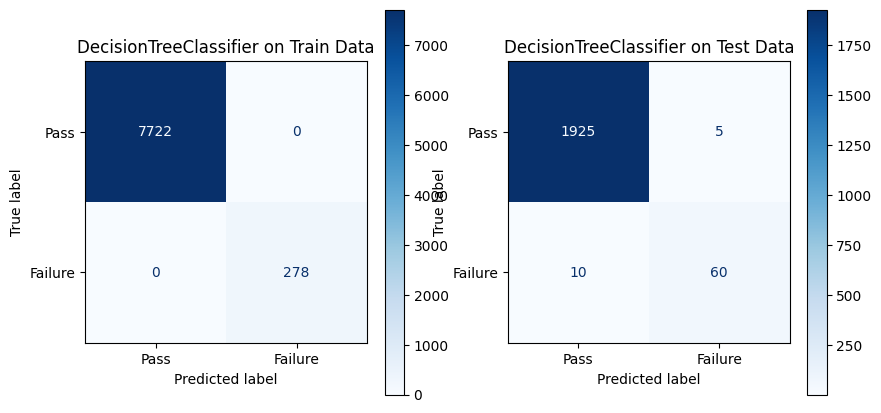

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 1.0
- F2 Score on Test Data: 0.8695652173913043
- Accuracy on Training Data: 1.0
- Accuracy on Test Data: 0.9925
- Recall on Training Data: 1.0
- Recall on Test Data: 0.8571428571428571
- Precision on Training Data: 1.0
- Precision on Test Data: 0.9230769230769231


In [6]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42)
analyze_model_performance(cdt, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

The accuracy of decision tree == 1.0 in our training dataset which suggest overfitting.

We should reduce the overfitting by choosing max_depth, min_samples_leaf, min_samples_split
by optimizing our hyper parameter


### Optimizing Hyperparameter For Decision Tree

In [7]:
print(y_train.columns)

Index(['Machine failure', 'TWF', 'HDF', 'PWF', 'OSF', 'RNF'], dtype='object')


In [8]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, fbeta_score
def optimize(X_train, y_train):
    f2_scorer = make_scorer(fbeta_score, beta=2)

    # Define the parameter grid
    param_grid = {'criterion':["gini","entropy"],
    'max_depth': [5,10],
    'min_samples_leaf': [10, 20, 30],
    'min_samples_split': [20, 30, 40]}

    # Create an instance of the DecisionTreeClassifier
    clf = DecisionTreeClassifier(random_state=42)

    # Create an instance of the GridSearchCV
    grid_search = GridSearchCV(clf, param_grid, cv=5, scoring=f2_scorer)

    if isinstance(y_train, pd.DataFrame):
        # Fit the GridSearchCV to the data
        grid_search.fit(X_train, y_train['Machine failure'])
    else:
        grid_search.fit(X_train, y_train)
    # Print the best set of hyperparameters
    print("Best hyperparameters: ", grid_search.best_params_)
optimize(X_train,y_train)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}


We found that best parameters for our decision tree is 
 {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 30, 'min_samples_split': 20}

###  Decision Tree With Optimized Parameters 

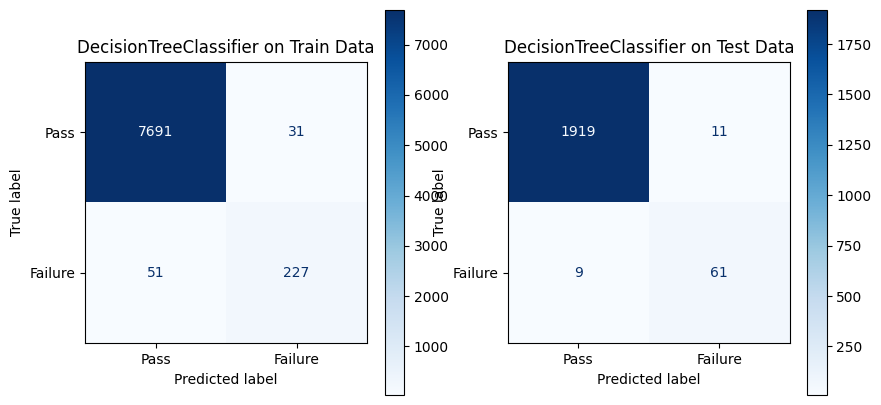

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 0.8284671532846716
- F2 Score on Test Data: 0.8664772727272727
- Accuracy on Training Data: 0.98975
- Accuracy on Test Data: 0.99
- Recall on Training Data: 0.8165467625899281
- Recall on Test Data: 0.8714285714285714
- Precision on Training Data: 0.8798449612403101
- Precision on Test Data: 0.8472222222222222


In [9]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=30, min_samples_split=20)
analyze_model_performance(cdt, X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

Threshold Predictor: 
- F2 Score on Training Data: 0.6654767975522693
- F2 Score on Test Data: 0.7012195121951219
- Accuracy on Training Data: 0.924375
- Accuracy on Test Data: 0.928

LogisticRegression:
- F2 Score on Training Data: 0.293631100082713
- F2 Score on Test Data: 0.23255813953488372
- Accuracy on Training Data: 0.970875
- Accuracy on Test Data: 0.9685

LogisticRegression on balanced dataset
- F2 Score on Training Data: 0.8526746390243292
- F2 Score on Test Data: 0.6944771290708951
- Accuracy on Training Data: 0.8526936026936027
- Accuracy on Test Data: 0.8555

DecisionTreeClassifier  :
- F2 Score on Training Data: 1.0
- F2 Score on Test Data: 0.8695652173913043
- Accuracy on Training Data: 1.0
- Accuracy on Test Data: 0.9925

DecisionTreeClassifier with optimized parameter :
- F2 Score on Training Data: 0.8284671532846716
- F2 Score on Test Data: 0.8664772727272727
- Accuracy on Training Data: 0.98975
- Accuracy on Test Data: 0.99

Decision Tree performed so much better than logistic regression especially on F2 for Test Data, the accuracy is also very good.
Decision Tree also performed better than Threshold Predictor.

## Decision Tree on Balanced Data


Let's see if using balanced dataset will improved our F2 and accuracy

## Decision Tree on SMOTE based on Machine Failure


In [10]:
optimize(X_train_over_omf,y_train_over_omf)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 40}


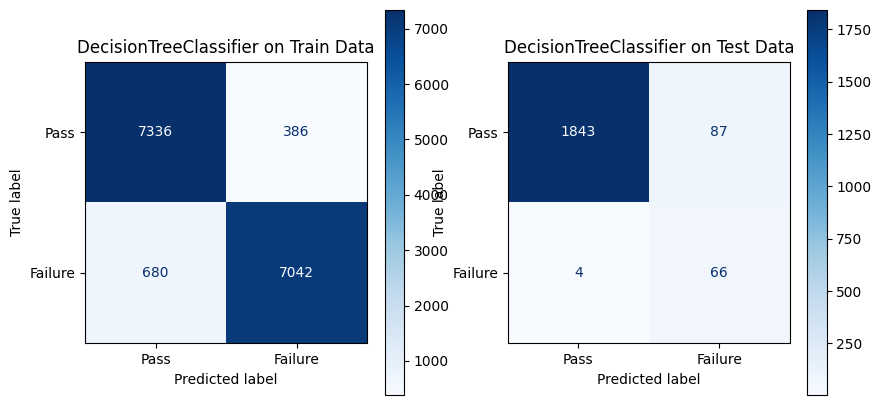

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 0.9189372585864913
- F2 Score on Test Data: 0.7621247113163973
- Accuracy on Training Data: 0.930976430976431
- Accuracy on Test Data: 0.9545
- Recall on Training Data: 0.911939911939912
- Recall on Test Data: 0.9428571428571428
- Precision on Training Data: 0.9480344641895531
- Precision on Test Data: 0.43137254901960786


In [11]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=20, min_samples_split=20)
analyze_model_performance(cdt, X_train=X_train_over_omf, y_train=y_train_over_omf, X_test=X_test, y_test=y_test)

DecisionTreeClassifier  with optimized parameter :
- F2 Score on Training Data: 0.8284671532846716
- F2 Score on Test Data: 0.8664772727272727
- Accuracy on Training Data: 0.98975
- Accuracy on Test Data: 0.99


DecisionTreeClassifier with smote :
- F2 Score on Training Data: 0.9189372585864913
- F2 Score on Test Data: 0.7621247113163973
- Accuracy on Training Data: 0.930976430976431
- Accuracy on Test Data: 0.9545


Using balanced dataset where we have more failure data, Decision Tree classifier performed well.

However, while it reduced the number of False Negative, it increased False Positive by large amount 11->87 which is not a good outcome
Our F2-score actually went down.

In short, balanced data set does not improve our Decision Tree

## Decision Tree on Random Over Sampler


In [12]:
optimize(X_ros_train,y_ros_train)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 20, 'min_samples_split': 20}


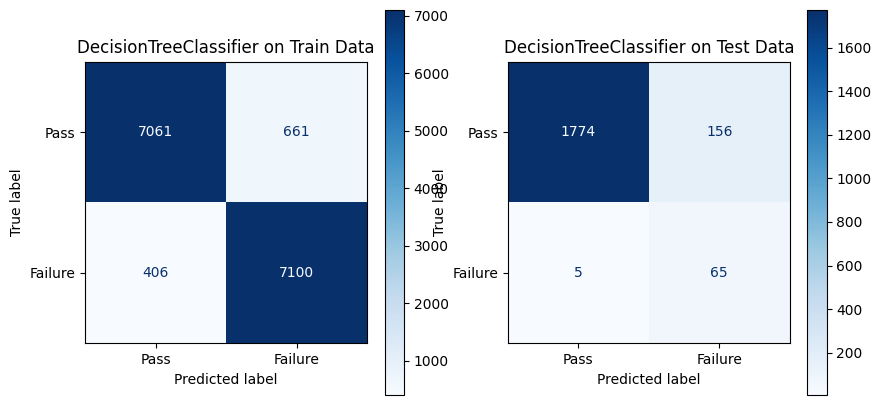

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 0.9395262670371841
- F2 Score on Test Data: 0.6487025948103793
- Accuracy on Training Data: 0.9299317047543998
- Accuracy on Test Data: 0.9195
- Recall on Training Data: 0.9459099387156941
- Recall on Test Data: 0.9285714285714286
- Precision on Training Data: 0.9148305630717691
- Precision on Test Data: 0.29411764705882354


In [13]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=20, min_samples_split=20)
analyze_model_performance(cdt, X_train=X_ros_train, y_train=y_ros_train, X_test=X_test, y_test=y_test)

Random Over Sampler reduce False Negative at high increase of False Positive

## Decision Tree on MLSMOTE


In [14]:
optimize(X_mls_train,y_mls_train)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 20}


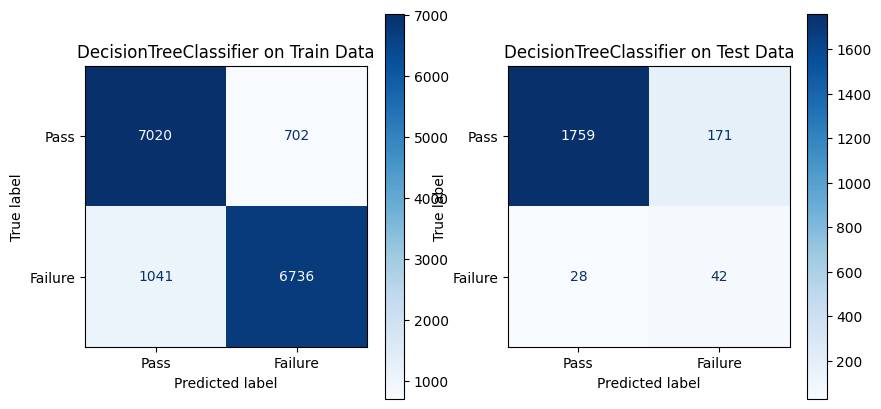

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 0.8737612203600893
- F2 Score on Test Data: 0.4259634888438134
- Accuracy on Training Data: 0.8875411316859152
- Accuracy on Test Data: 0.9005
- Recall on Training Data: 0.8661437572328662
- Recall on Test Data: 0.6
- Precision on Training Data: 0.9056197902662005
- Precision on Test Data: 0.19718309859154928


In [15]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=30, min_samples_split=20)
analyze_model_performance(cdt, X_train=X_mls_train, y_train=y_mls_train, X_test=X_test, y_test=y_test)

MLSMOTE performed very badly

## Decision Tree on MLSMOTE-RUS


In [16]:
optimize(X_mls_rus_train,y_mls_rus_train)

Best hyperparameters:  {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 10, 'min_samples_split': 40}


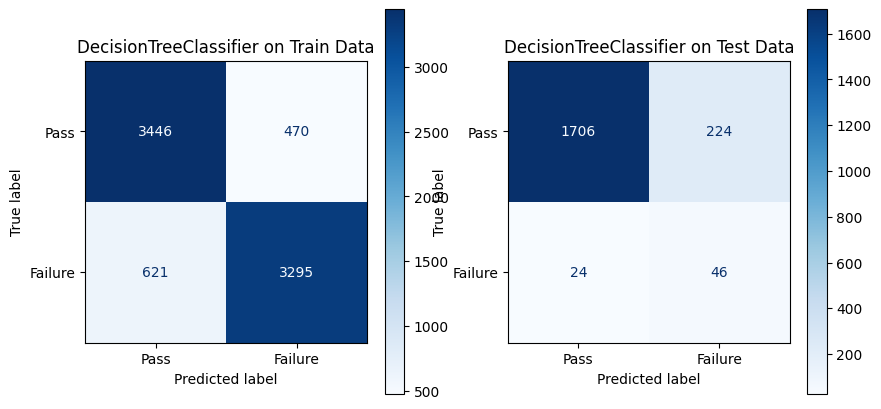

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 0.8479592361933193
- F2 Score on Test Data: 0.41818181818181815
- Accuracy on Training Data: 0.8606996935648621
- Accuracy on Test Data: 0.876
- Recall on Training Data: 0.8414198161389173
- Recall on Test Data: 0.6571428571428571
- Precision on Training Data: 0.8751660026560425
- Precision on Test Data: 0.17037037037037037


In [17]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=10, min_samples_split=20)
analyze_model_performance(cdt, X_train=X_mls_rus_train, y_train=y_mls_rus_train, X_test=X_test, y_test=y_test)

## Decision Tree on ROS-RUS


In [18]:
optimize(X_ros_rus_train,y_ros_rus_train)

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 20}


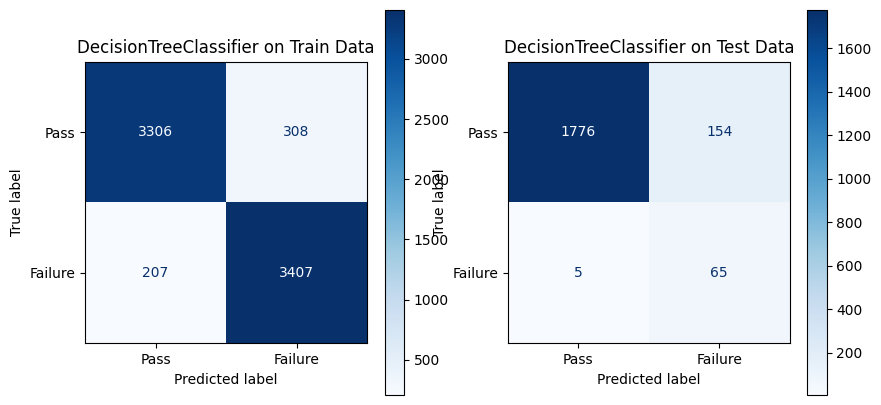

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 0.937482802267349
- F2 Score on Test Data: 0.6513026052104208
- Accuracy on Training Data: 0.9287493082457111
- Accuracy on Test Data: 0.9205
- Recall on Training Data: 0.9427227448810183
- Recall on Test Data: 0.9285714285714286
- Precision on Training Data: 0.917092866756393
- Precision on Test Data: 0.2968036529680365


In [19]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=4, min_samples_leaf=20, min_samples_split=20)
analyze_model_performance(cdt, X_train=X_ros_rus_train, y_train=y_ros_rus_train, X_test=X_test, y_test=y_test)

## Decision Tree on Balanced DataSet
When we train using balanced dataset, our F2 score went down.

Few possible reasons :
- SMOTE introduces noisy or overlapping samples where the synthetic sample marked as failure is actually the same with passing majority samples
- Inflating minority class or removing majority class reduce the generalization ability of decision tree
- Decision Tree already has ability to handle class imbalance inherently


## Decision Tree on Reduced Features


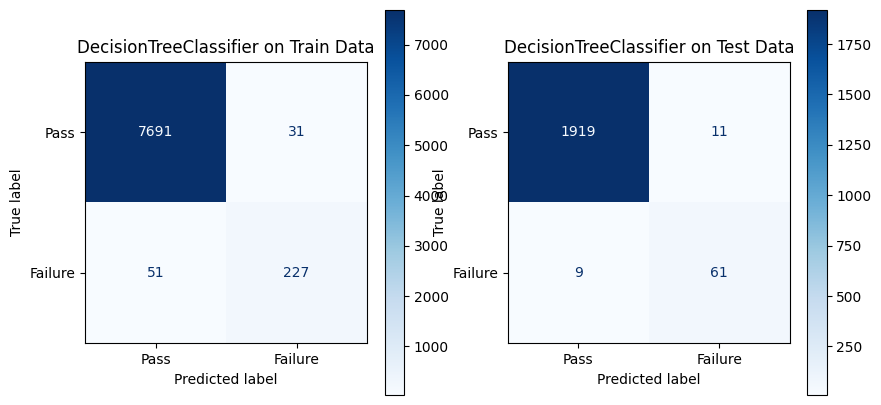

 For `Machine failure` label:
DecisionTreeClassifier  :
- F2 Score on Training Data: 0.8284671532846716
- F2 Score on Test Data: 0.8664772727272727
- Accuracy on Training Data: 0.98975
- Accuracy on Test Data: 0.99
- Recall on Training Data: 0.8165467625899281
- Recall on Test Data: 0.8714285714285714
- Precision on Training Data: 0.8798449612403101
- Precision on Test Data: 0.8472222222222222


In [20]:
from sklearn.tree import DecisionTreeClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=30, min_samples_split=20)
analyze_model_performance(cdt, X_train=X_train_reduced, y_train=y_train, X_test=X_test_reduced, y_test=y_test)

DecisionTreeClassifier with optimized parameter :
- F2 Score on Training Data: 0.8284671532846716
- F2 Score on Test Data: 0.8664772727272727
- Accuracy on Training Data: 0.98975
- Accuracy on Test Data: 0.99

DecisionTreeClassifier  on reduced dataset :
- F2 Score on Training Data: 0.8284671532846716
- F2 Score on Test Data: 0.8664772727272727
- Accuracy on Training Data: 0.98975
- Accuracy on Test Data: 0.99

Reducing features does not change the performance of decision tree but it does simplify our model as it deals with less features

Going forward we should use reduced dataset

# Multi-label / output Classifier

Given our data is actually multilabel, it will be good to produce a model that can also identify the type of failures not just `Machine failure`

However, we won't be able to use balanced dataset unless we could figure out how to create balanced data set for multi label data

## Train Data

Number of mismatches: 90 out of 8000 predictions
Percentage of mismatches: 1.12%


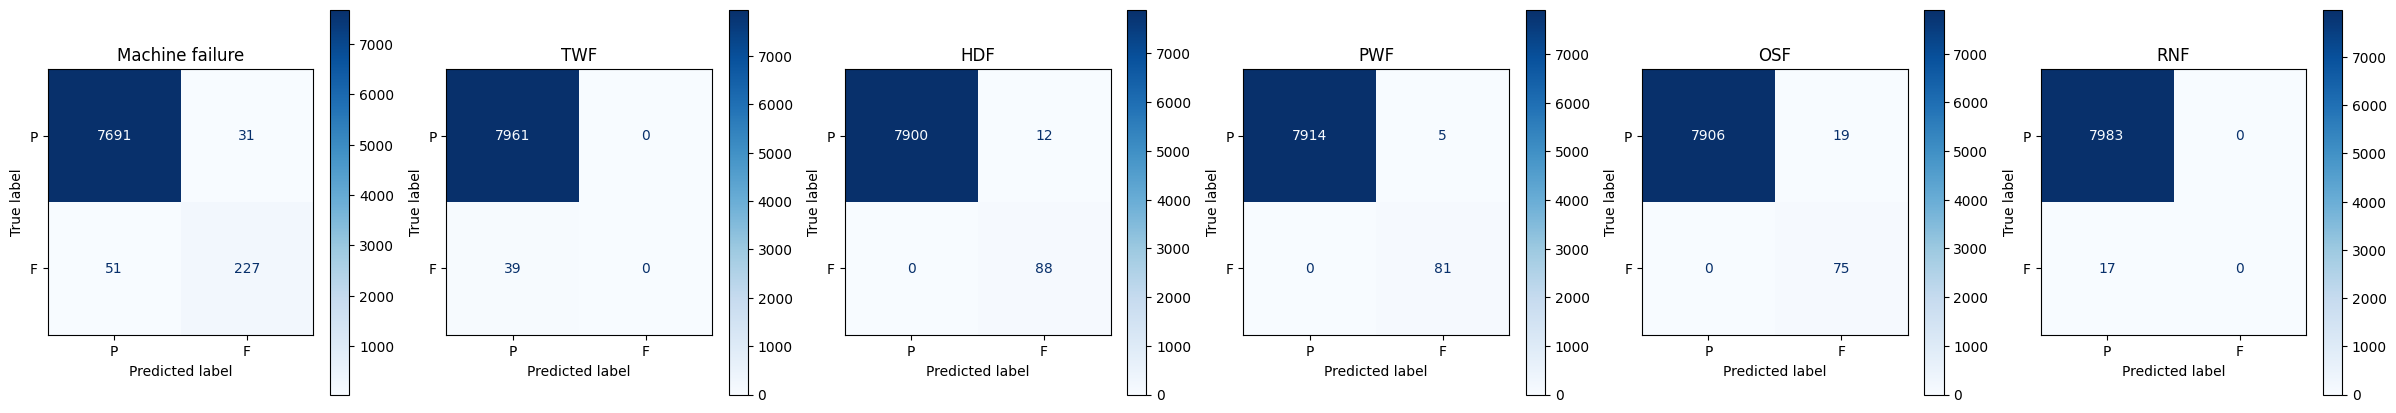

F2 value on train data 0.8284671532846716
Accuracy on train data 0.98975


In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=30, min_samples_split=20)
cdt = MultiOutputClassifier(cdt)
cdt.fit(X_train_reduced, y_train)
y_pred=cdt.predict(X_train_reduced)
y_pred = pd.DataFrame(y_pred, columns=y_train.columns)
count_mismatches = 0
for i in range(len(y_pred)):
    for col in y_pred.columns:
        if y_pred[col][i] != y_train[col][i]:
            count_mismatches += 1
            break
print(f"Number of mismatches: {count_mismatches} out of {len(y_pred)} predictions")
print(f"Percentage of mismatches: {count_mismatches / len(y_pred) * 100:.2f}%")
no_of_label = len(y_train.columns)
i = 0
plt.figure(figsize=(30,5))
for label in y_train.columns:
    i +=1
    ax=plt.subplot(1, 6, i)
    cm = confusion_matrix(y_train[label],y_pred[label])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['P', 'F'])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(label=label)
plt.show()
f2_test=fbeta_score(y_train['Machine failure'], y_pred['Machine failure'], beta=2)
accuracy=accuracy_score(y_train['Machine failure'], y_pred['Machine failure'])
print("F2 value on train data", f2_test)
print("Accuracy on train data", accuracy)

## Test data

Number of mismatches: 21 out of 2000 predictions
Percentage of mismatches: 1.05%


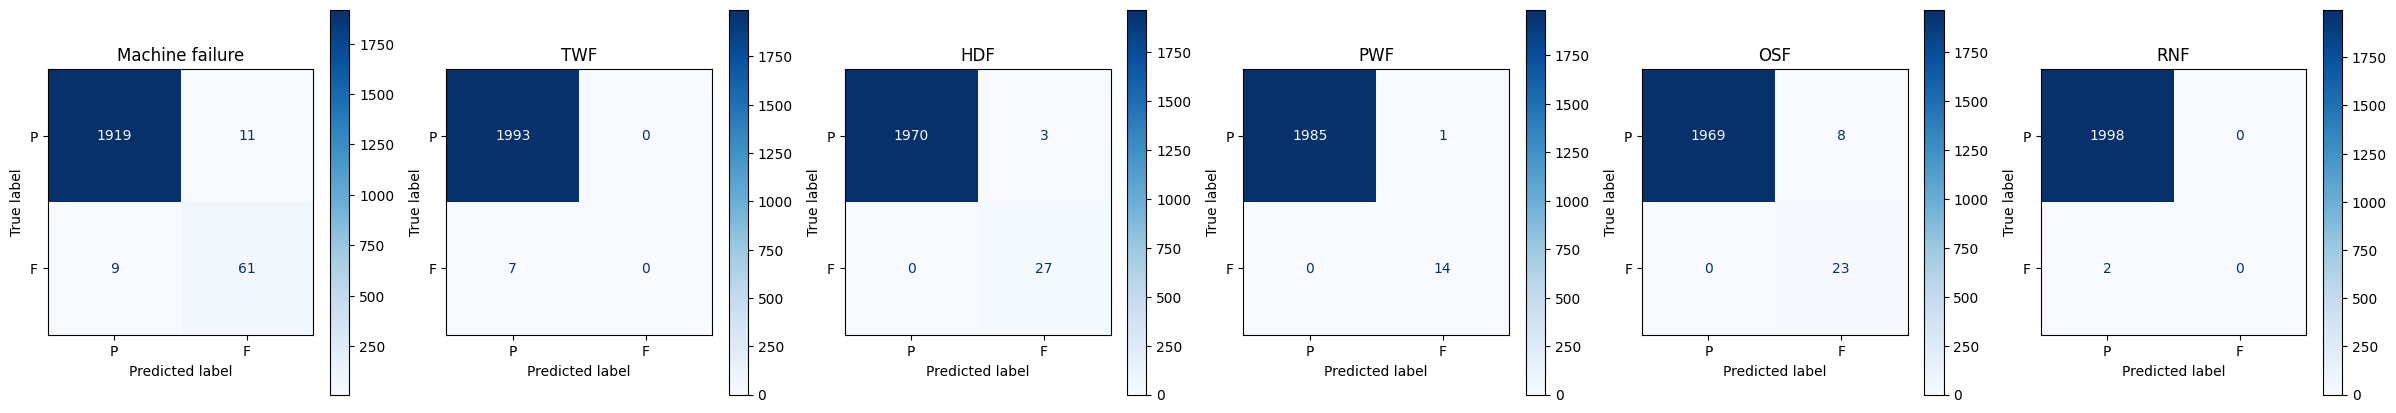

F2 value on test data 0.8664772727272727
Accuracy on test data 0.99


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier

cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=30, min_samples_split=20)
cdt = MultiOutputClassifier(cdt)
cdt.fit(X_train_reduced, y_train)
y_pred=cdt.predict(X_test_reduced)
y_pred = pd.DataFrame(y_pred, columns=y_test.columns)
count_mismatches = 0
for i in range(len(y_pred)):
    for col in y_pred.columns:
        if y_pred[col][i] != y_test[col][i]:
            count_mismatches += 1
            break
print(f"Number of mismatches: {count_mismatches} out of {len(y_pred)} predictions")
print(f"Percentage of mismatches: {count_mismatches / len(y_pred) * 100:.2f}%")
no_of_label = len(y_test.columns)
i = 0
plt.figure(figsize=(30,5))
for label in y_test.columns:
    i +=1
    ax=plt.subplot(1, 6, i)
    cm = confusion_matrix(y_test[label],y_pred[label])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['P', 'F'])
    disp.plot(cmap=plt.cm.Blues, ax=ax)
    plt.title(label=label)
plt.show()
f2_test=fbeta_score(y_test['Machine failure'], y_pred['Machine failure'], beta=2)
accuracy=accuracy_score(y_test['Machine failure'], y_pred['Machine failure'])
print("F2 value on test data", f2_test)
print("Accuracy on test data", accuracy)


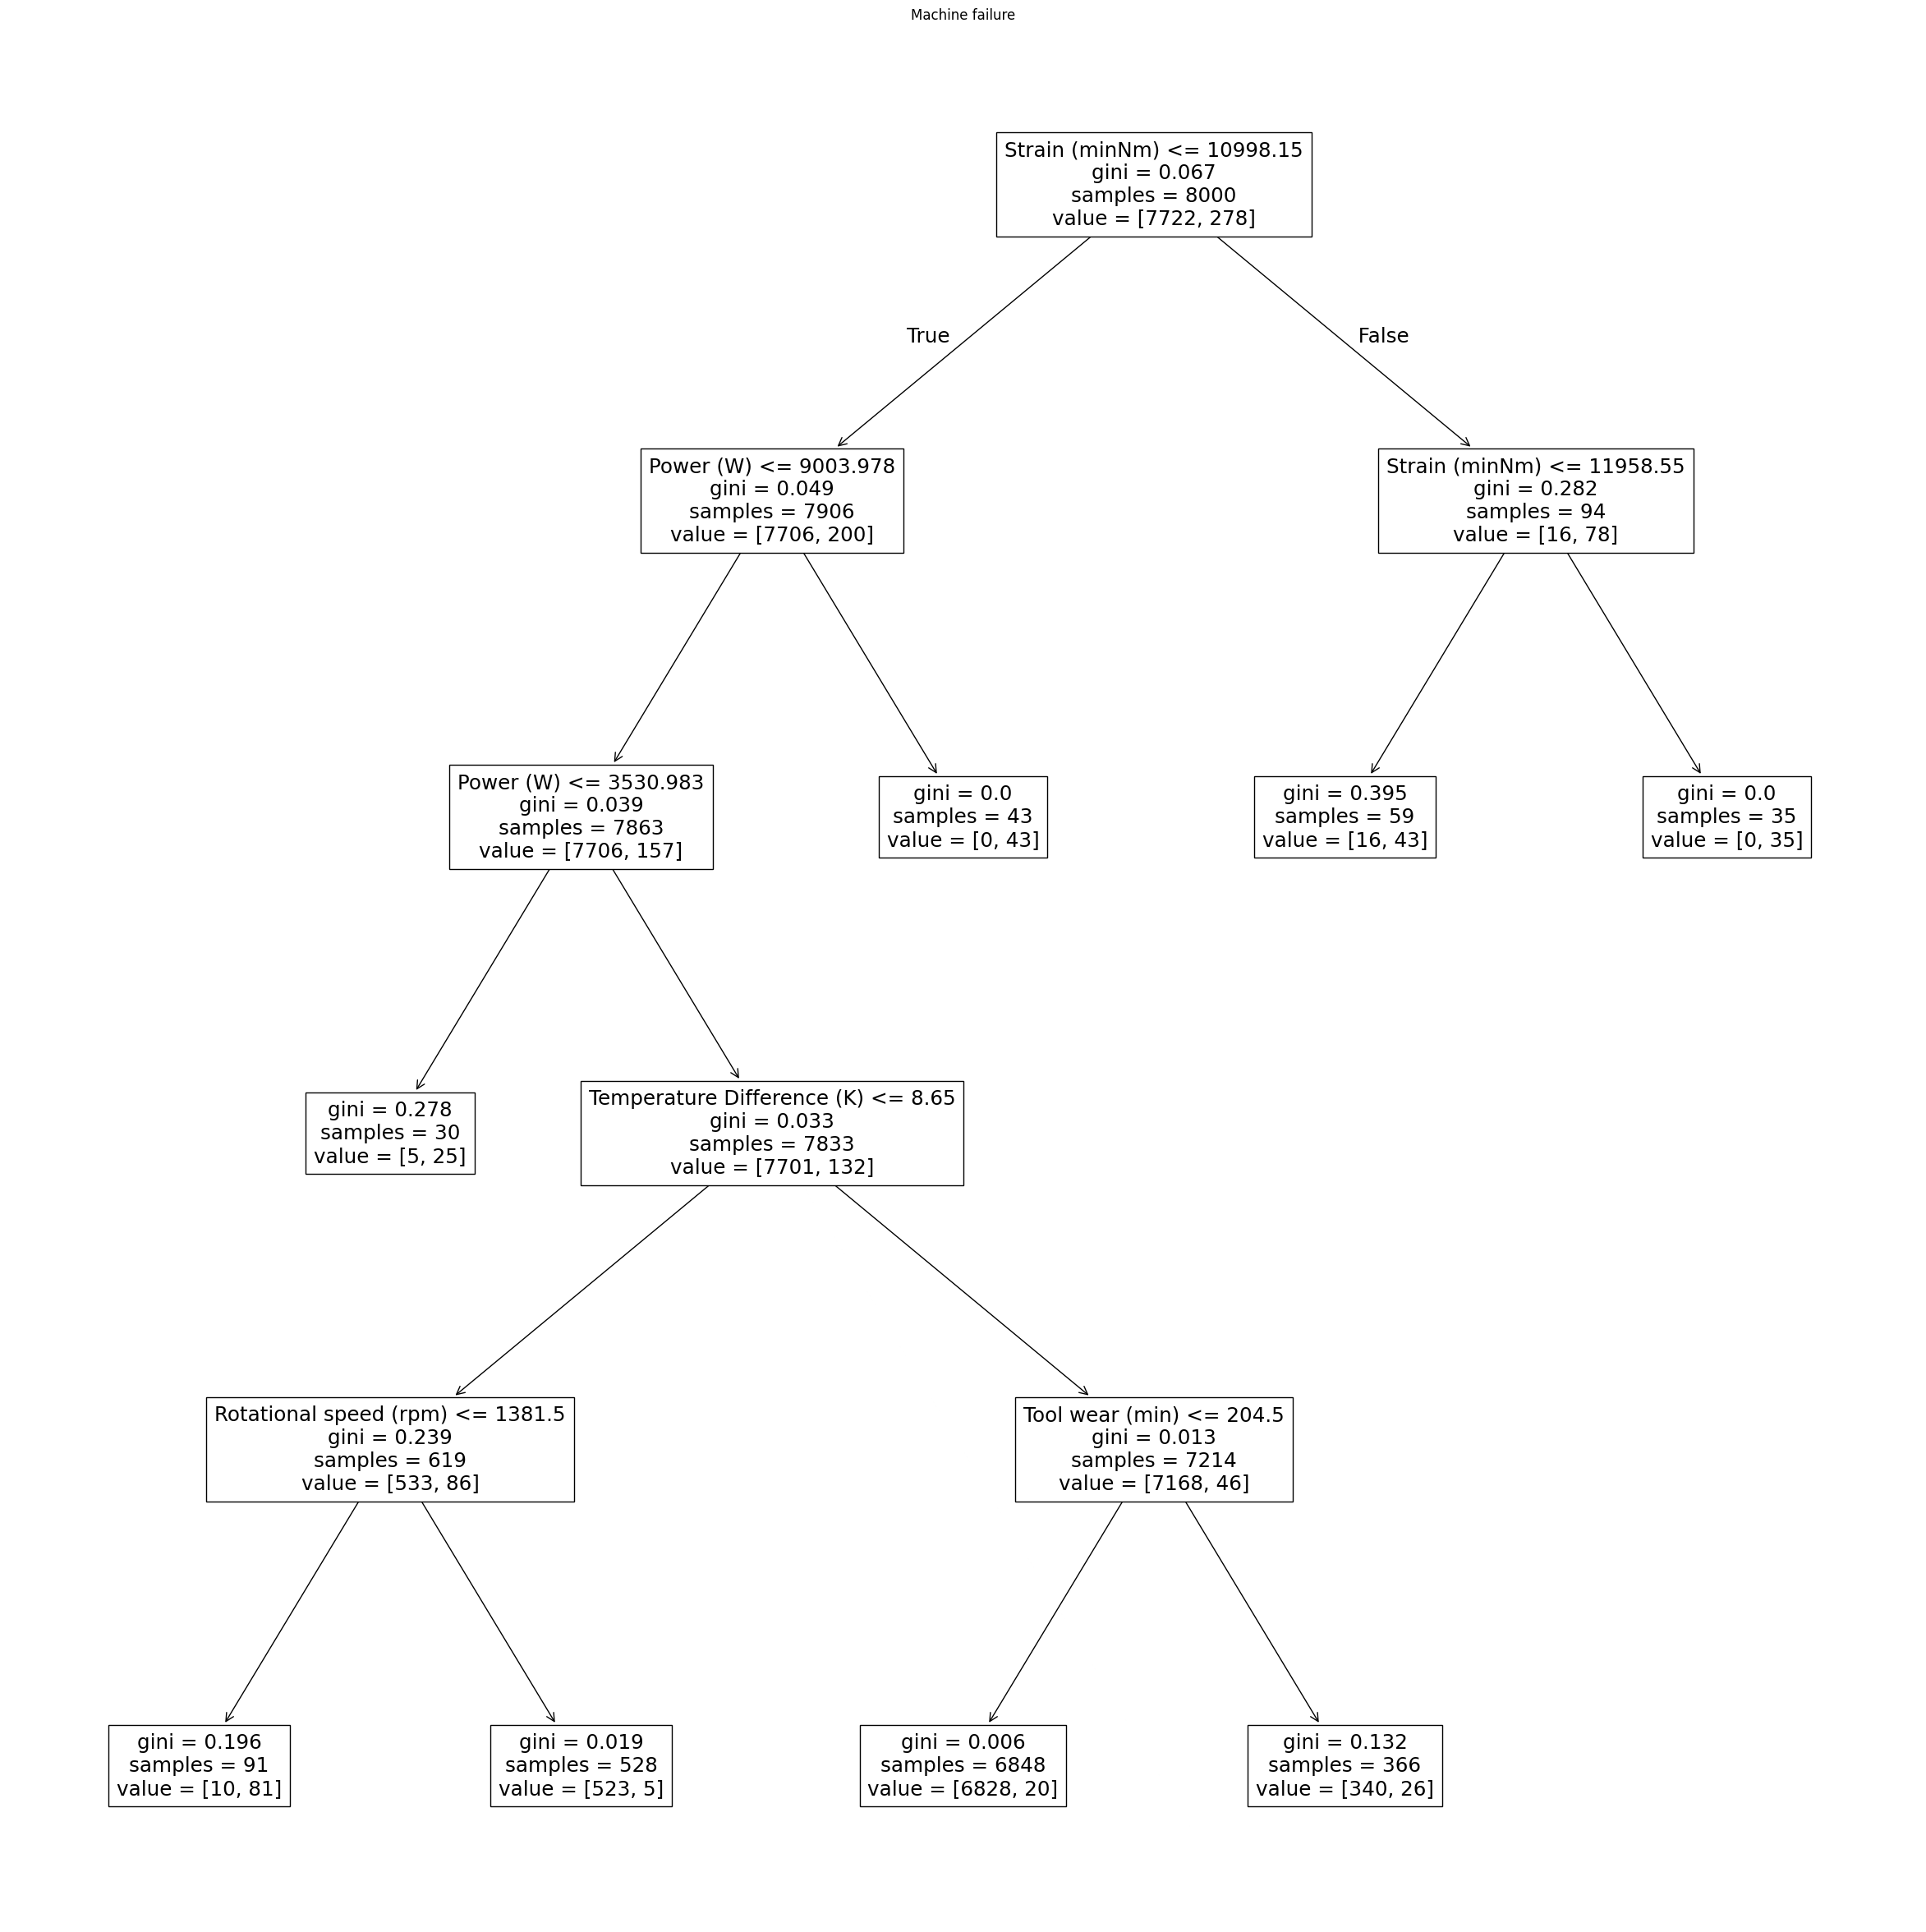

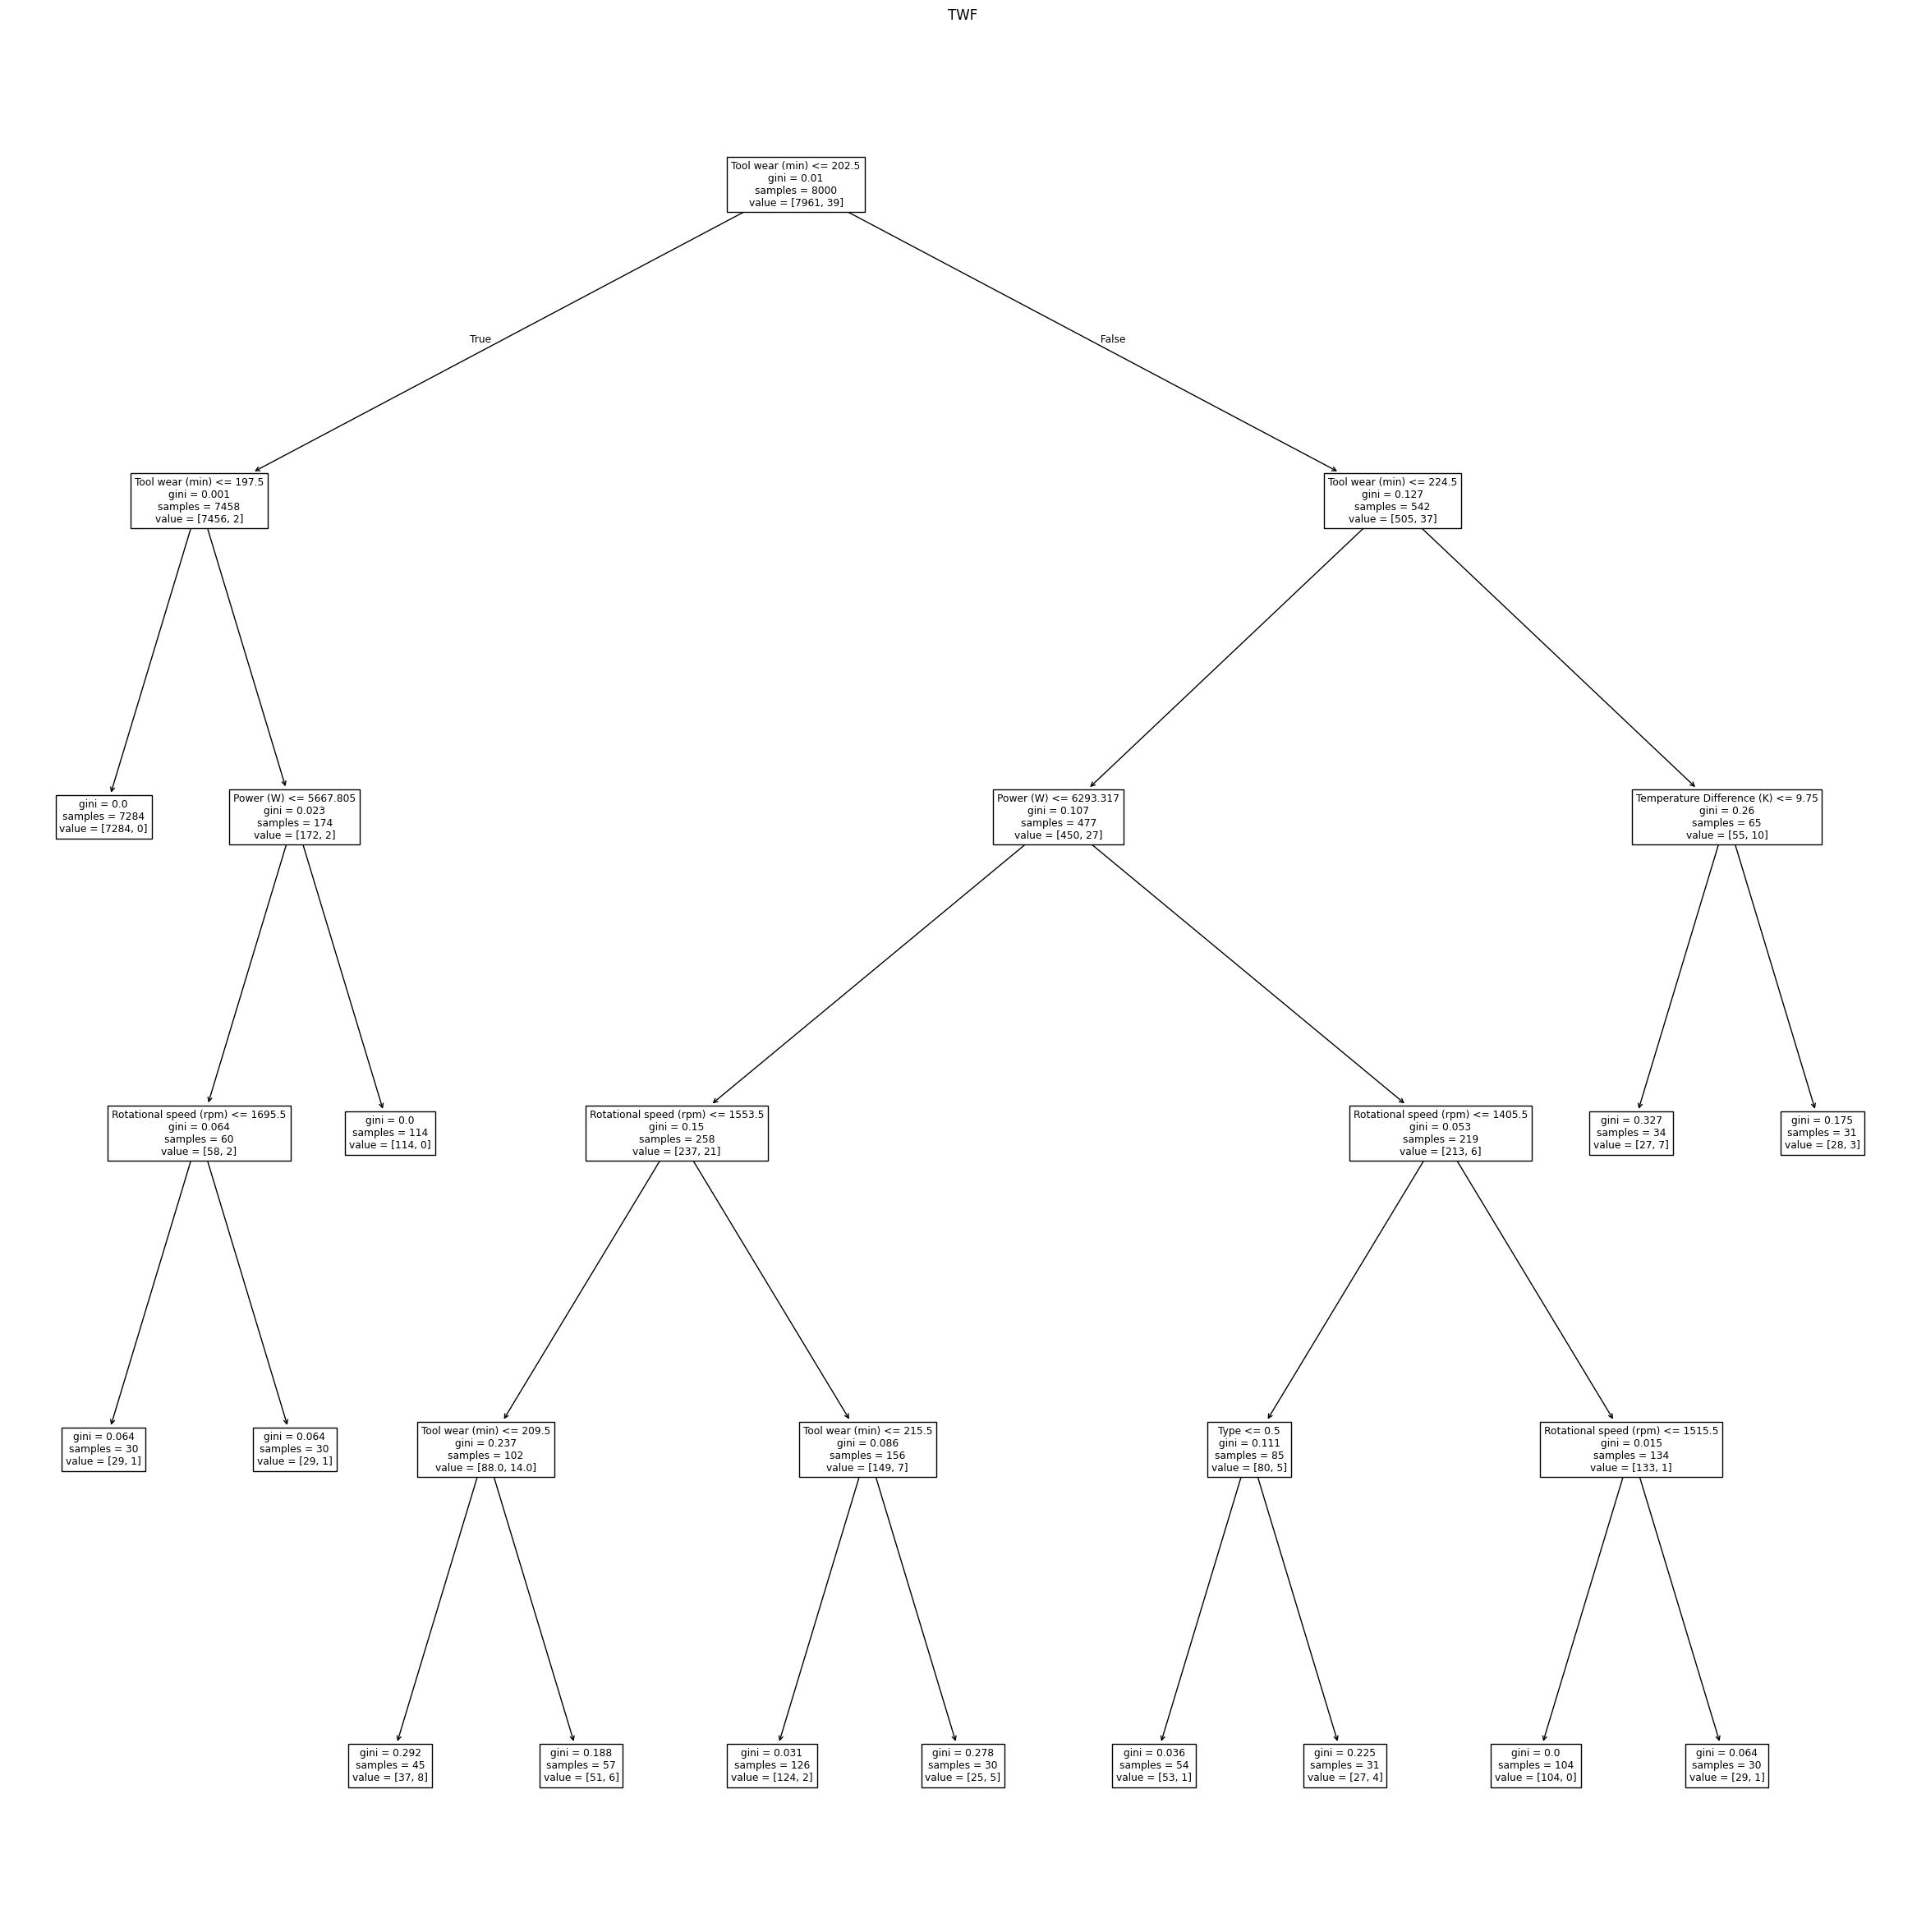

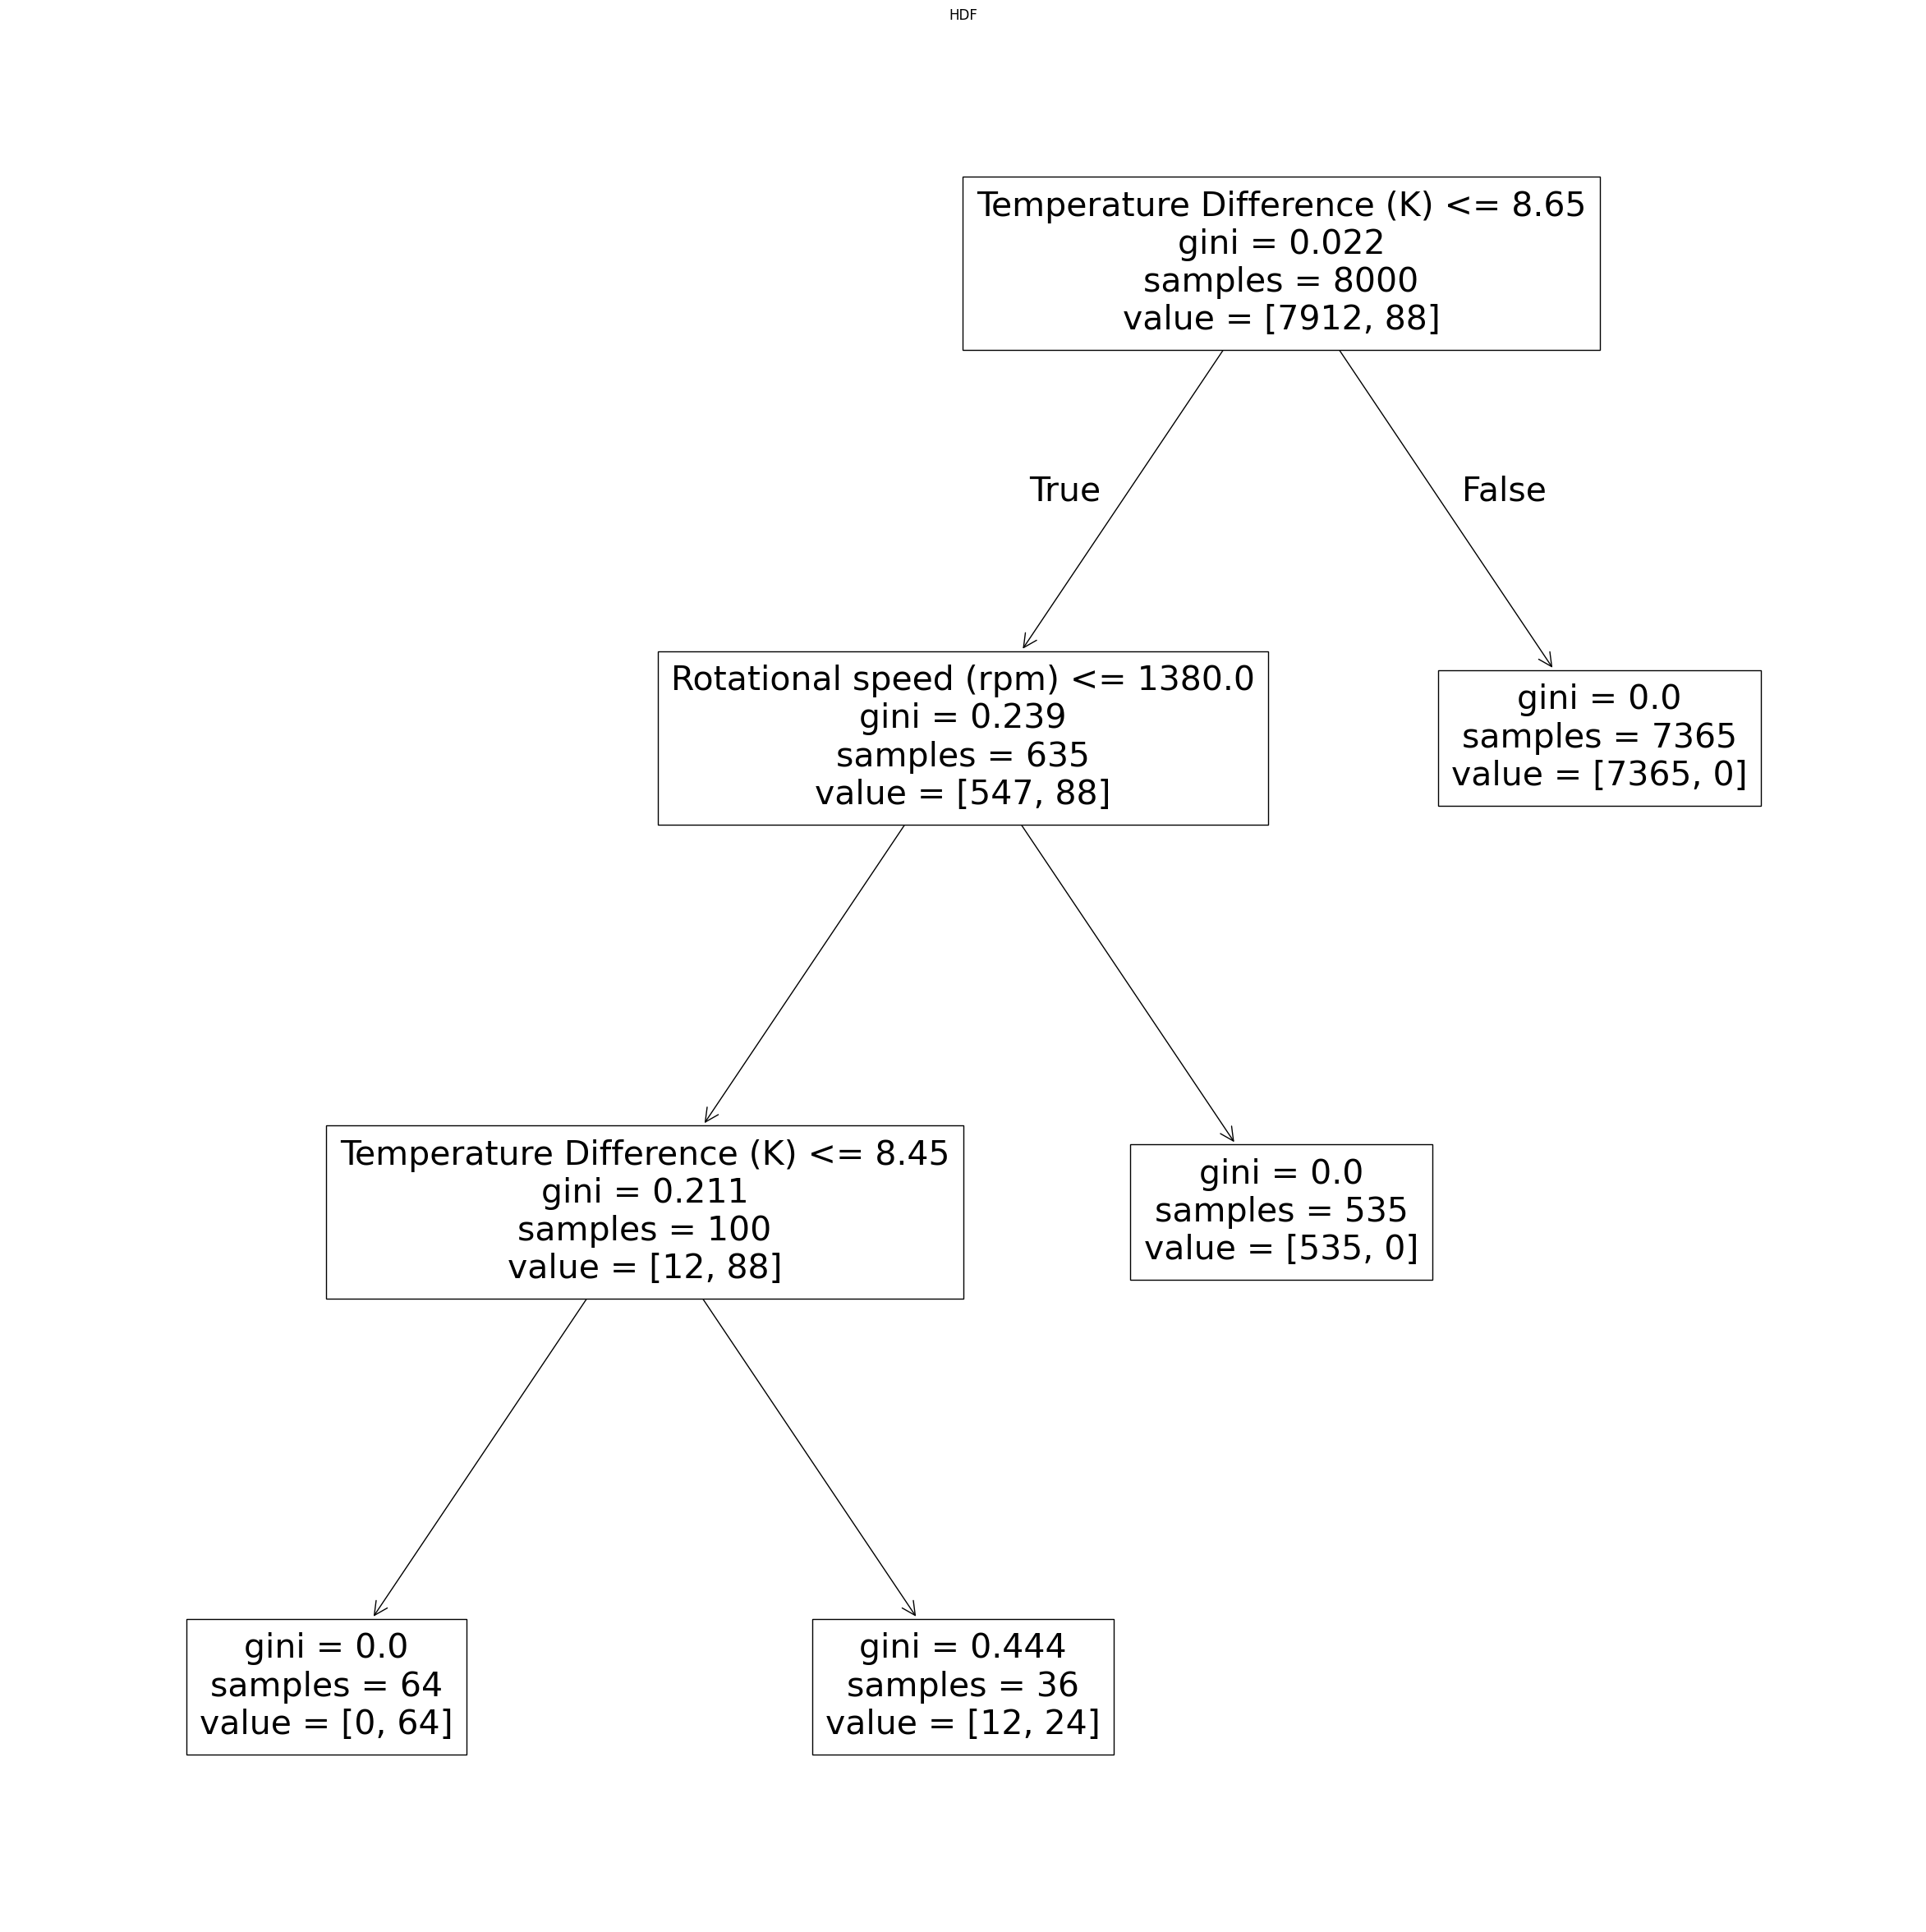

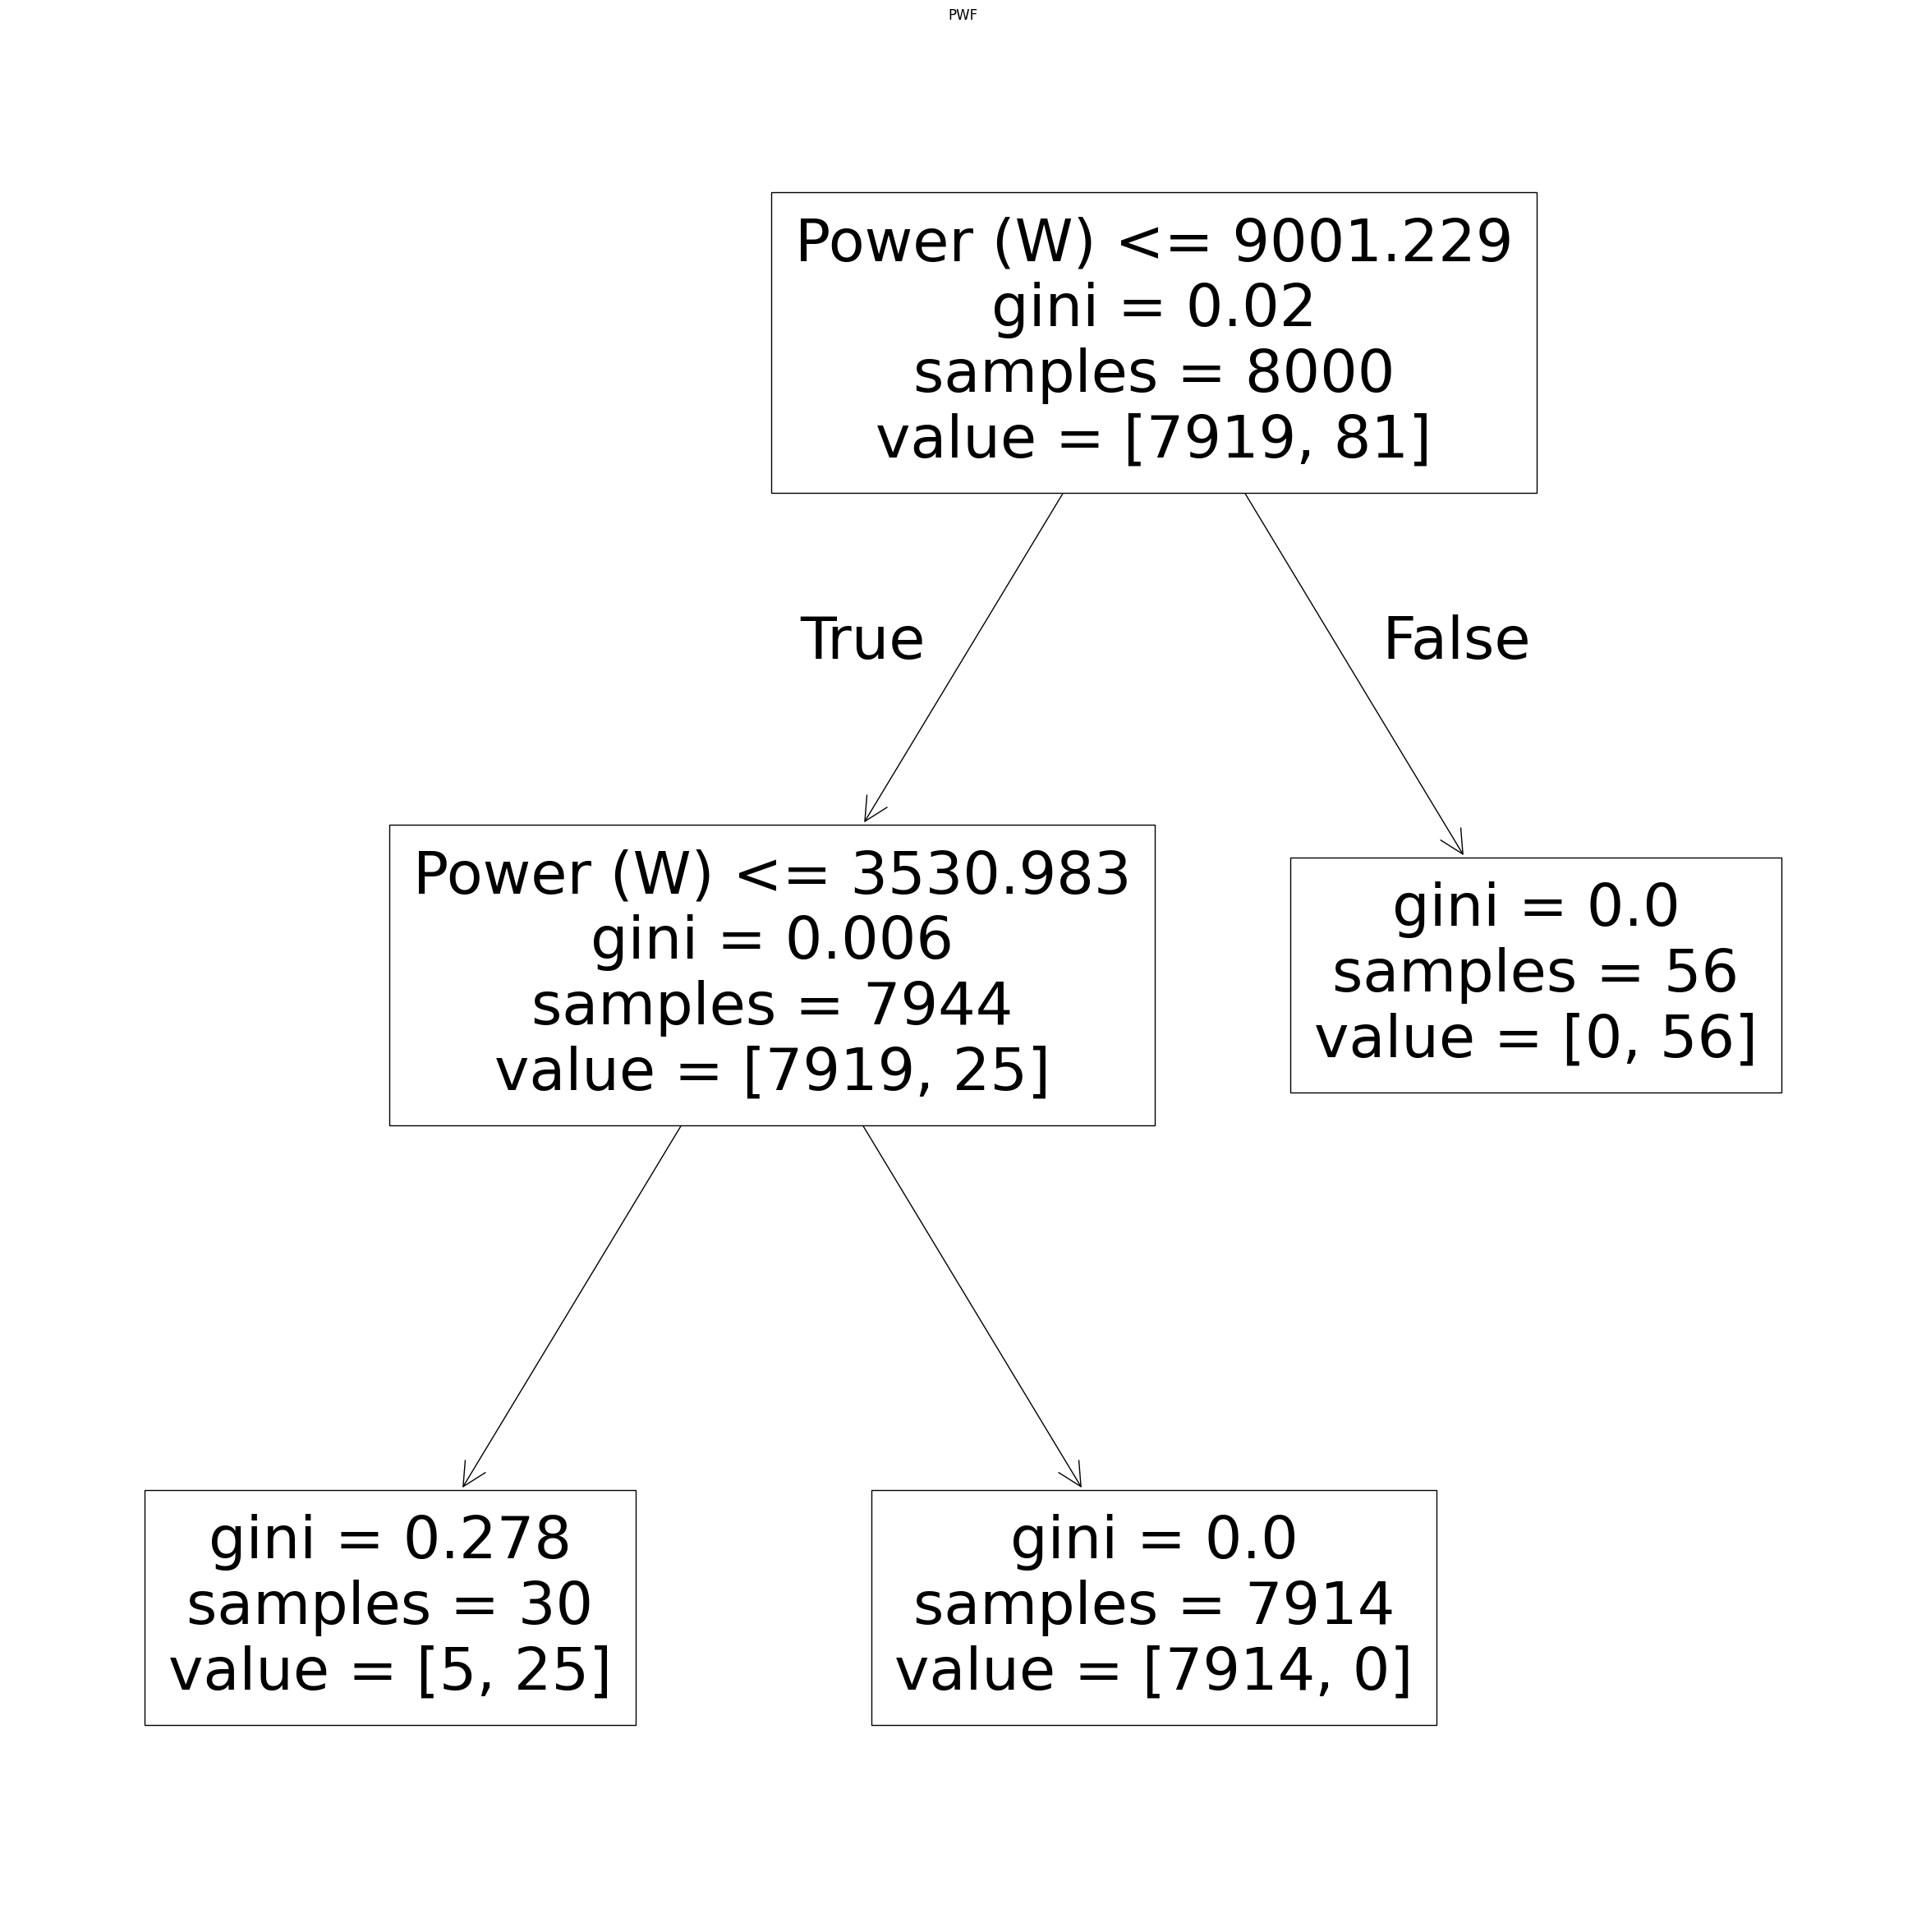

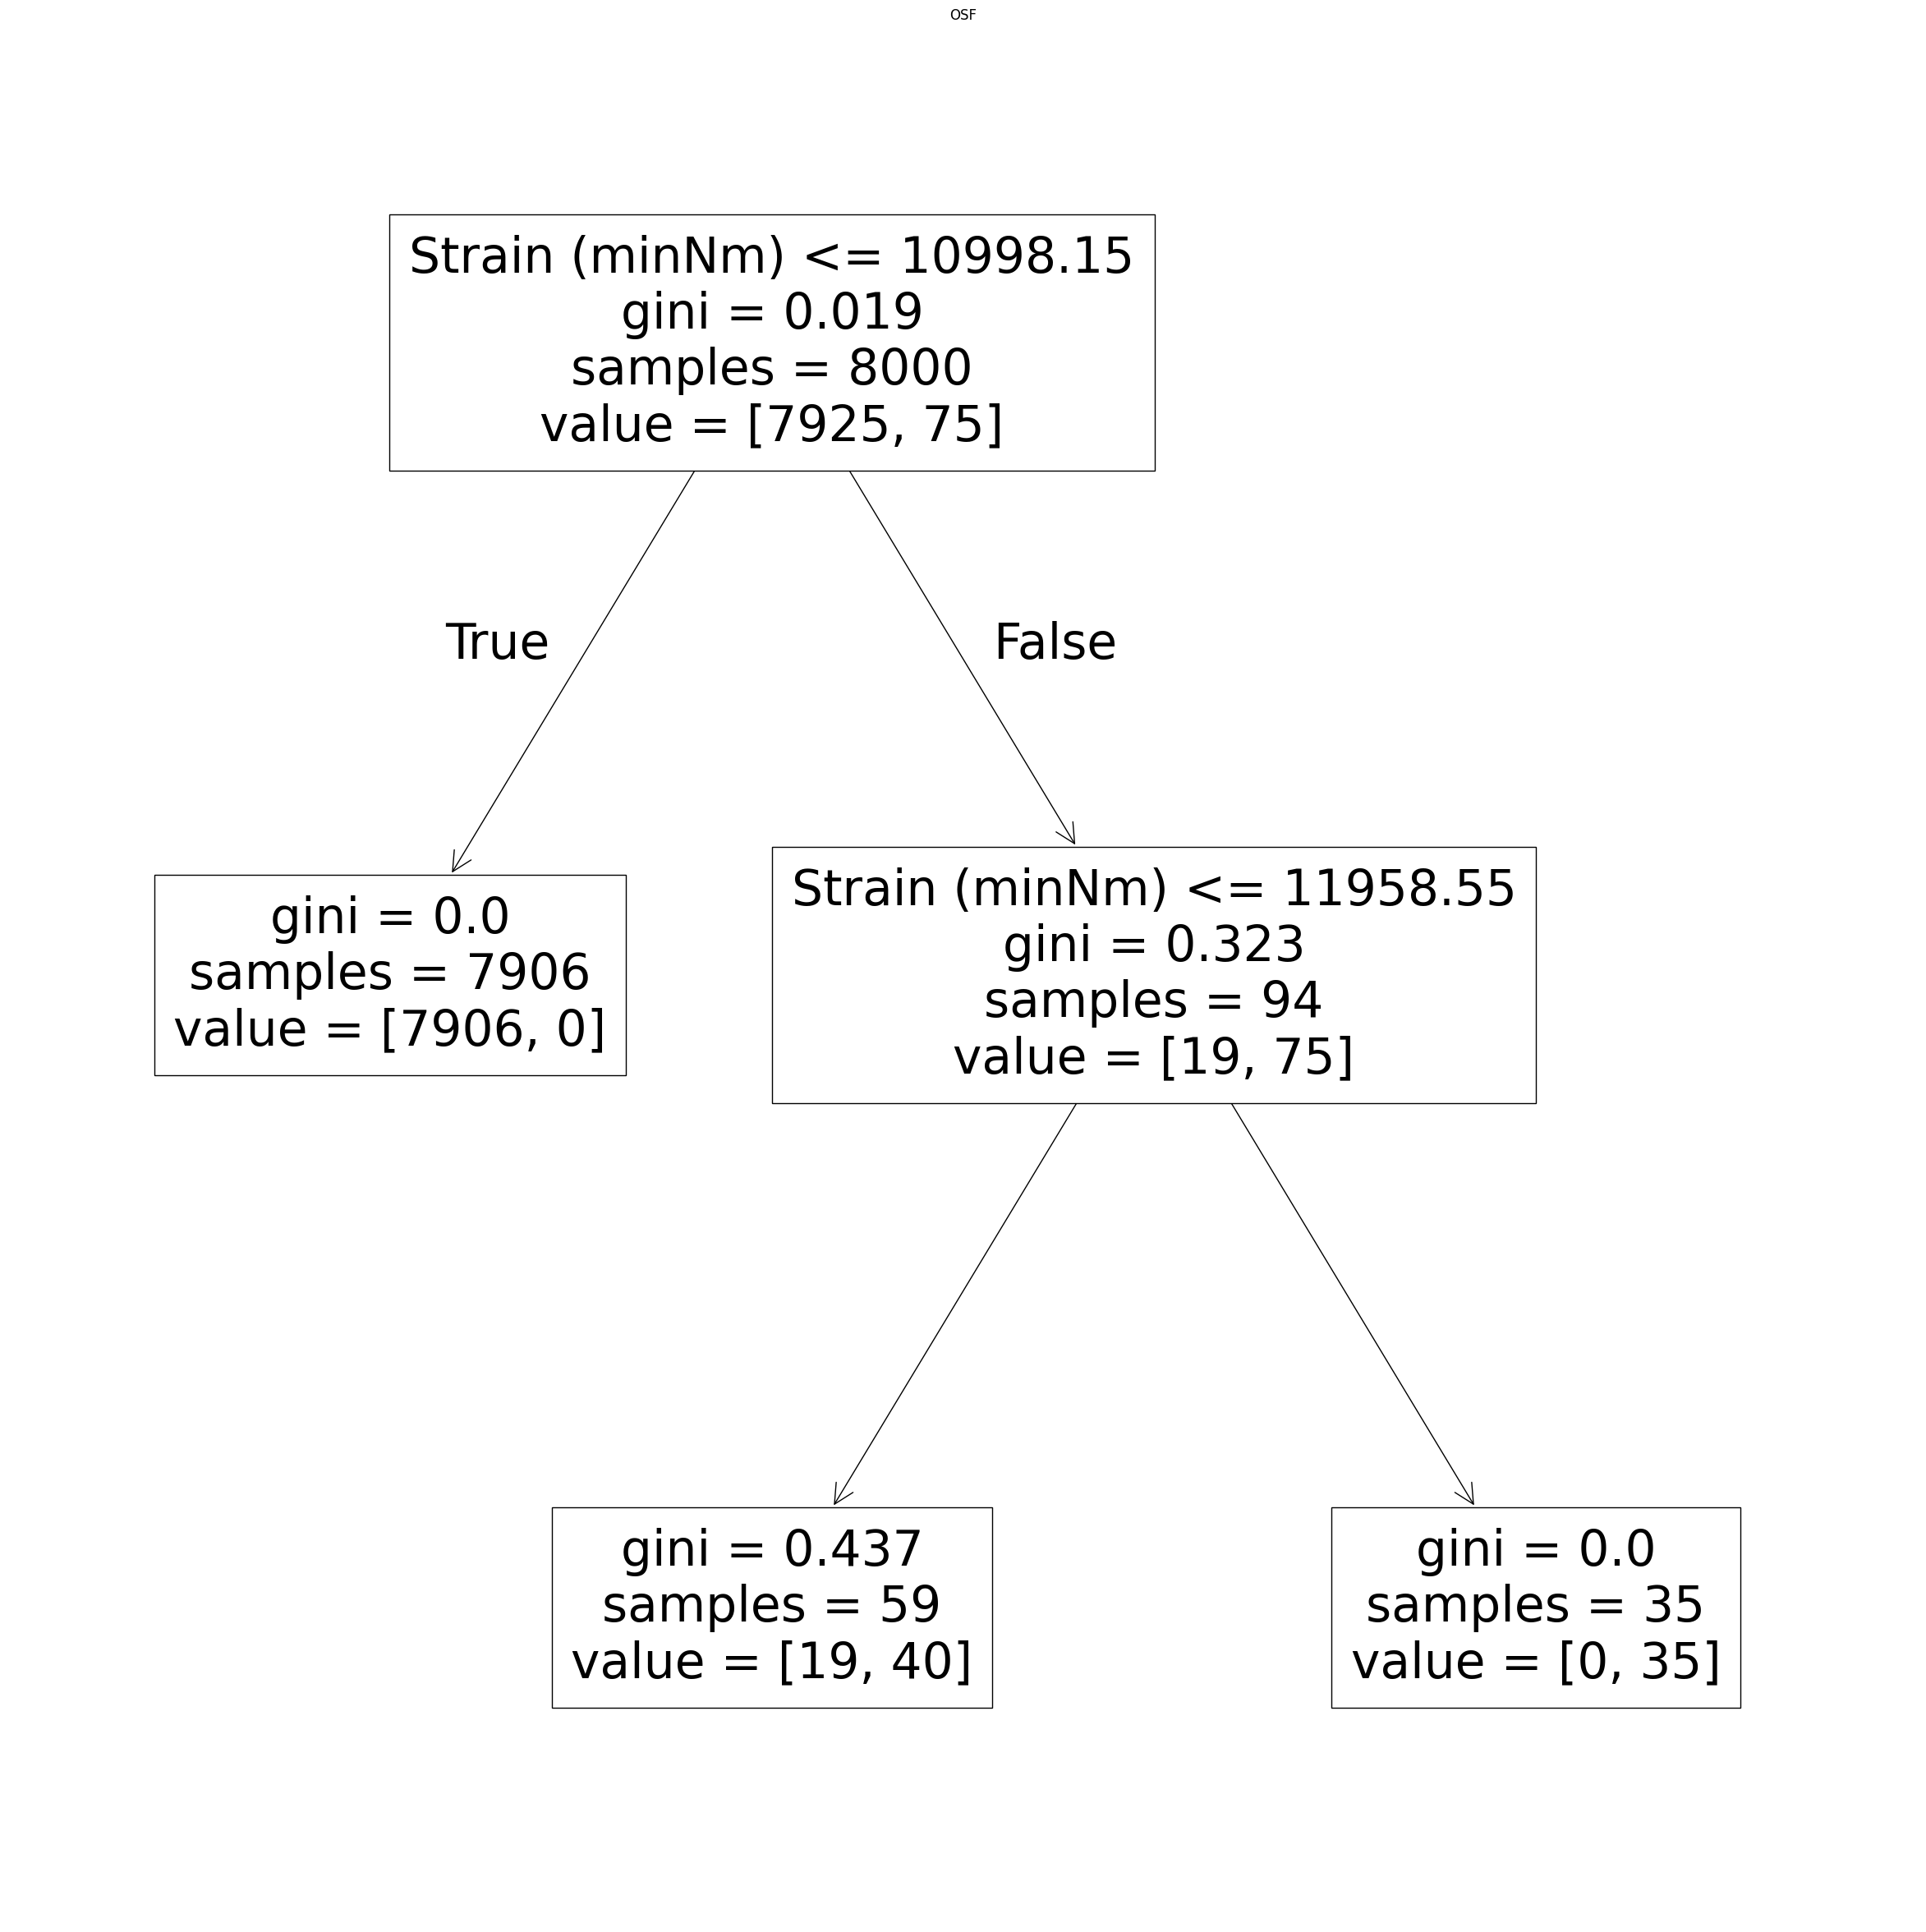

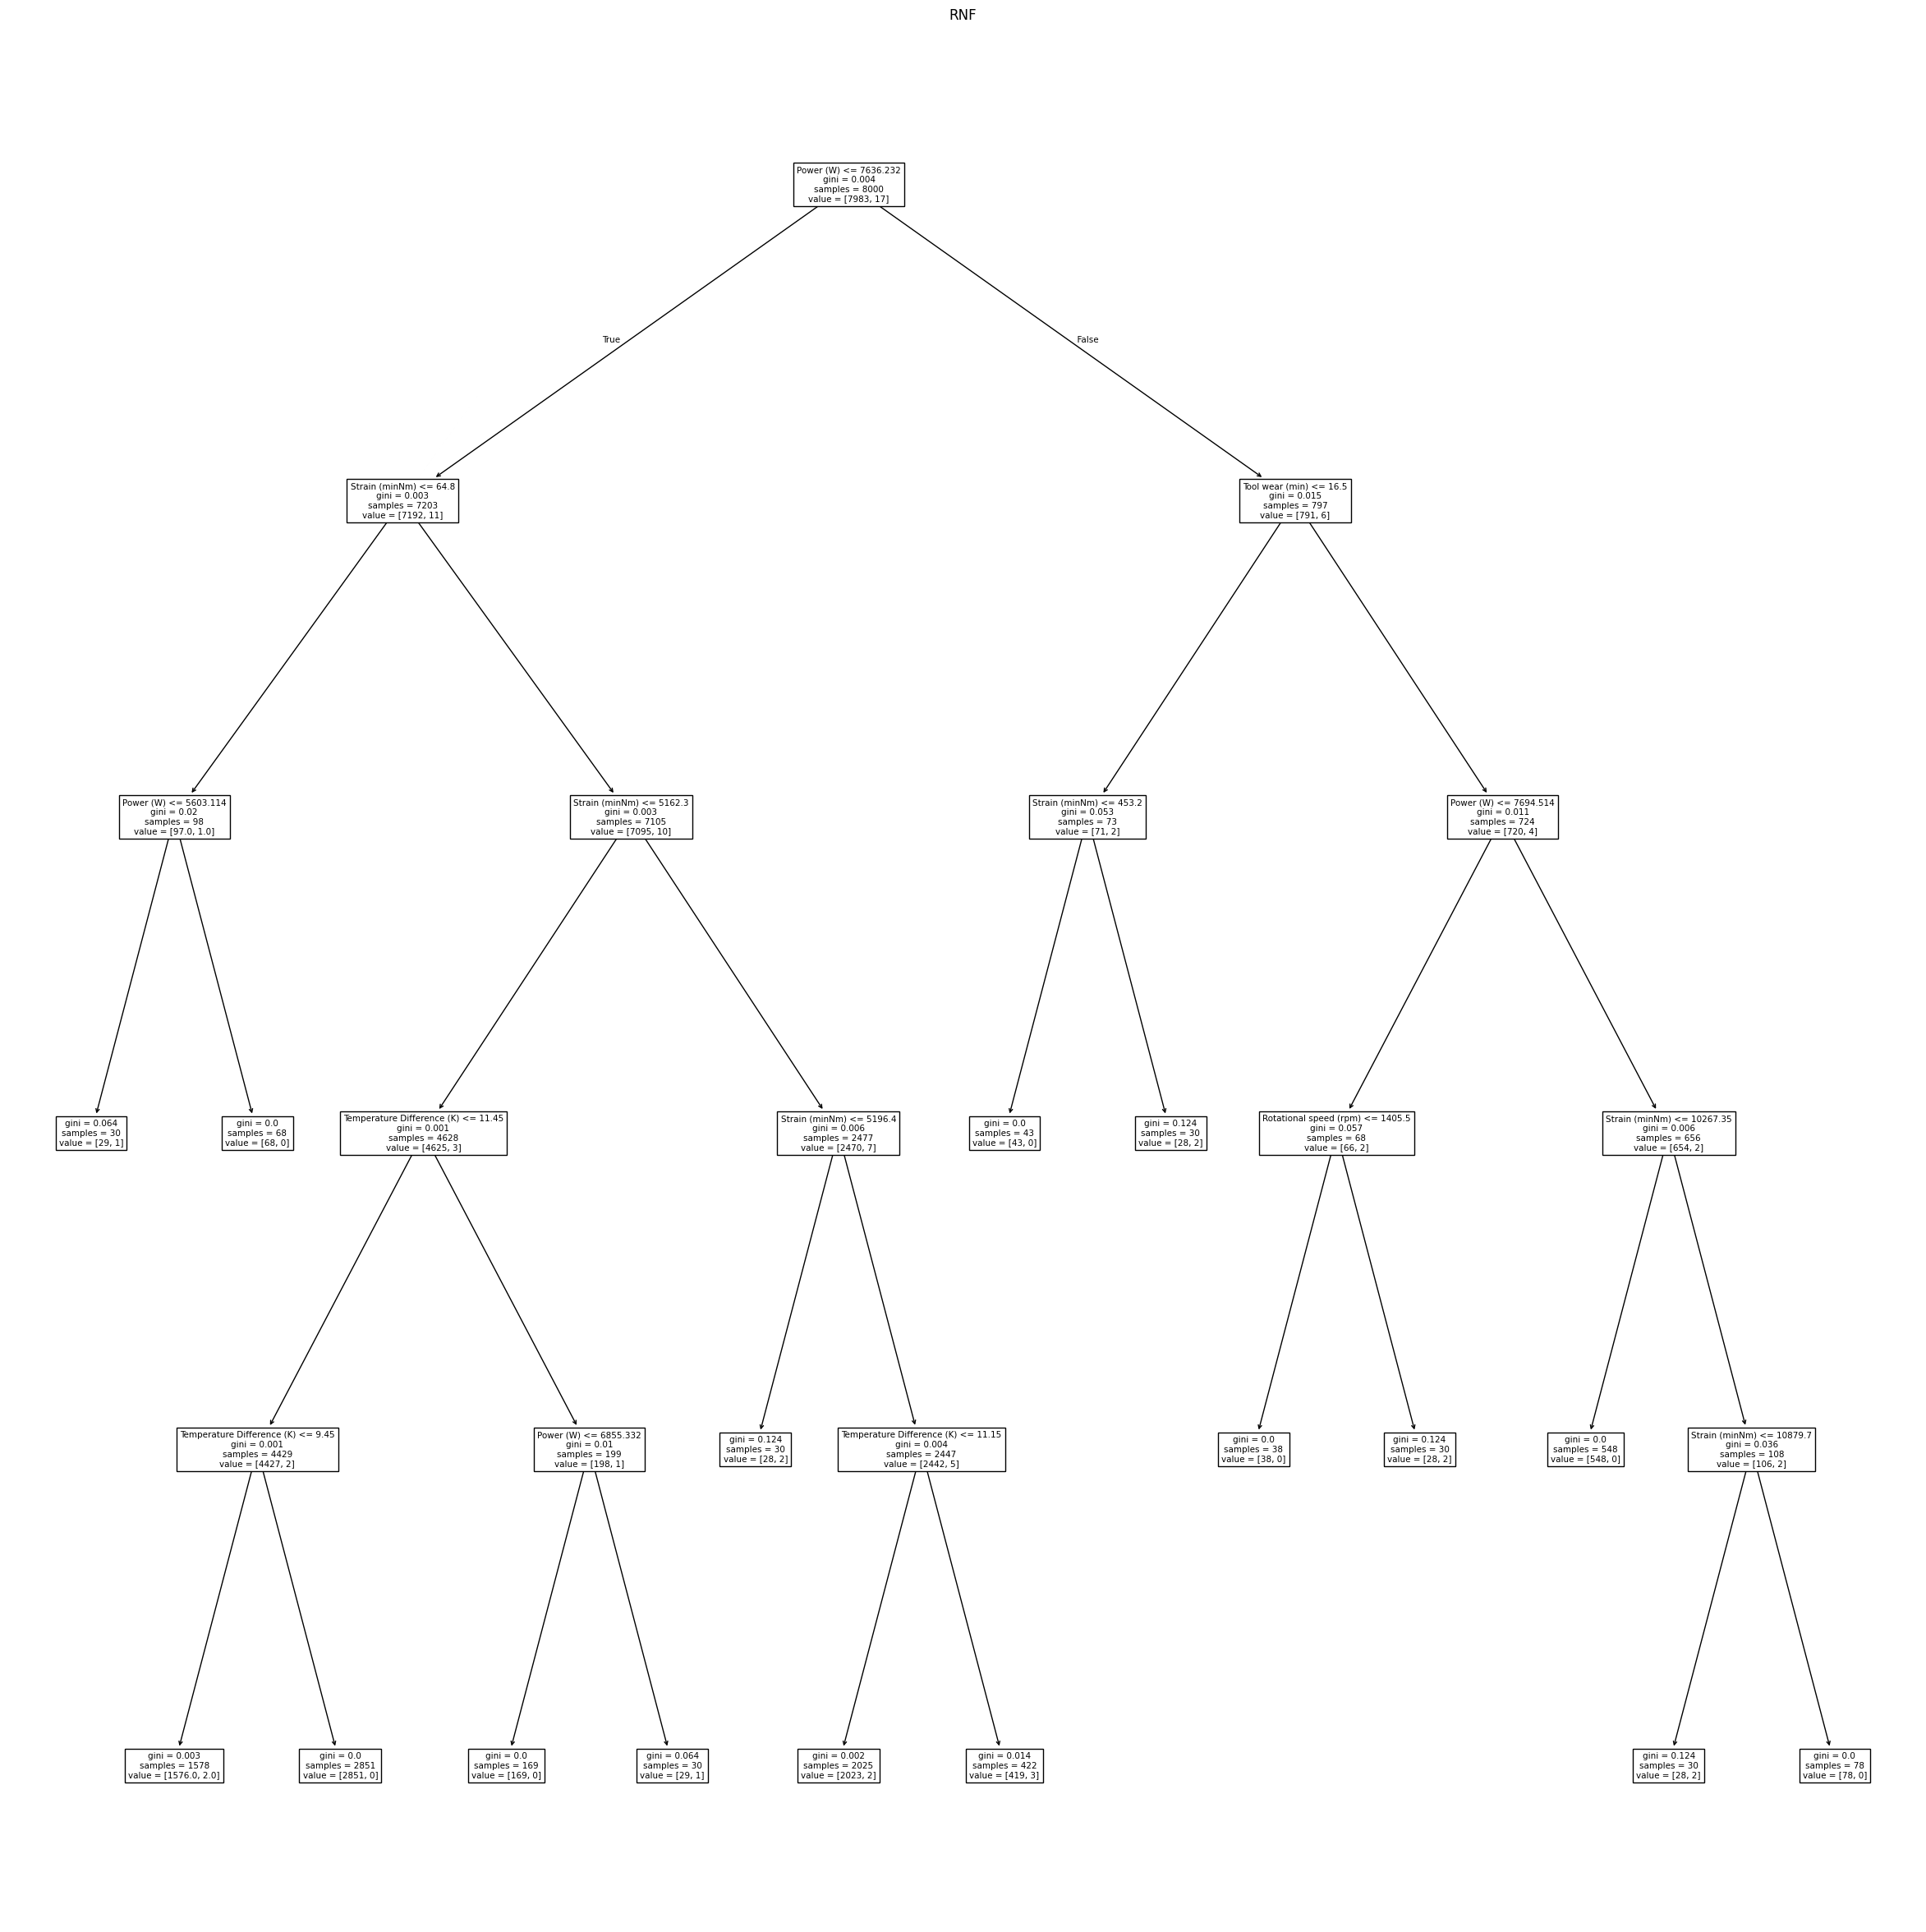

In [43]:
from sklearn import tree 

features = X_train_reduced.columns.tolist() 
labels = y_test.columns
for label in labels:
    plt.figure(figsize=(30,30))
    cdt = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_leaf=30, min_samples_split=20)
    cdt.fit(X_train_reduced, y_train[label])
    cdt.predict(X_test_reduced)
    tree.plot_tree(cdt, feature_names=features)
    plt.title(label)
plt.show()

Looking at the output, our multi-output classifier work well

It produces the same output as single output classifier which is what we expected

It also provide us some insight on decision tree classifier.

Our decision Tree failed to detect Tool Wear Failure (TWF) and Random Failure (RNF).
It works really well to detect Power Failure (PWF) and reasonably well for HDF and OSF

# Conclusion

We learned few things while evaluating DecisionTreeClassifier

- Reduced Features improve the F2 and Accuracy as we have simpler model and less noises
- Multi-output classifier work well
- SMOTE Balanced dataset may not work well for our dataset given that we may accidentally introduce noises by injecting synthetic observations that may destroy the pattern of the minority class (ref: https://towardsdatascience.com/why-smote-is-not-necessarily-the-answer-to-your-imbalanced-dataset-ef19881da57a/) as shown in our PCA analysis previously

Hence, we will compare other classifier using :
- multi-output classifier 
- reduced features

We also need to explore ensemble method to improve the weakness of decision tree classifier as it is not able to detect TWF 
